# 이미지를 ImageDataGenerator로 불러오기

In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = 'C:/Users/s_csmscox/jupyterSave/dvc/train_small'
validation_dir = 'C:/Users/s_csmscox/jupyterSave/dvc/valid_small'

batch_size = 20

train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=20,  # 지정된 각도 범위내에서 임의로 원본 이미지를 회전
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   zoom_range=0.1,    #  1-수치 혹은 1+수치만큼 확대 및 축소
                                   horizontal_flip=True,
                                   vertical_flip=True)

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    classes=['0', '1'],
    target_size=(128,128),                      
    batch_size=batch_size,     
    class_mode='categorical'                    
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    classes=['0', '1'],
    target_size=(128,128),                       
    batch_size=batch_size,    
    class_mode='categorical'                    
)


Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# 모델 학습

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

np.random.seed(42)

#모델 구축

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same',
                 activation='relu',
                 input_shape=(128, 128, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy',
                metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 128)       7

In [3]:
#모델 학습
early_stopping = EarlyStopping(patience = 5) # 조기종료 콜백함수 정의

# 데이터 개수 / batch_size
steps_per_epoch = 3000 / batch_size
val_steps = 1000 / batch_size

history = model.fit(train_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=100,
                    validation_data=validation_generator,
                    validation_steps=val_steps,
                    callbacks=[early_stopping],
                    verbose=1
                    )

Epoch 1/100
150/150 [==============================] - 15s 97ms/step - loss: 0.6922 - accuracy: 0.5210 - val_loss: 0.6658 - val_accuracy: 0.6160
Epoch 2/100
150/150 [==============================] - 15s 97ms/step - loss: 0.6580 - accuracy: 0.5917 - val_loss: 0.6334 - val_accuracy: 0.6420
Epoch 3/100
150/150 [==============================] - 14s 95ms/step - loss: 0.6076 - accuracy: 0.6607 - val_loss: 0.6524 - val_accuracy: 0.6510
Epoch 4/100
150/150 [==============================] - 14s 95ms/step - loss: 0.5919 - accuracy: 0.6773 - val_loss: 0.5863 - val_accuracy: 0.7070
Epoch 5/100
150/150 [==============================] - 14s 96ms/step - loss: 0.5738 - accuracy: 0.6940 - val_loss: 0.5906 - val_accuracy: 0.6920
Epoch 6/100
150/150 [==============================] - 14s 95ms/step - loss: 0.5567 - accuracy: 0.7030 - val_loss: 0.5891 - val_accuracy: 0.7060
Epoch 7/100
150/150 [==============================] - 15s 97ms/step - loss: 0.5544 - accuracy: 0.7067 - val_loss: 0.5435 - val_ac

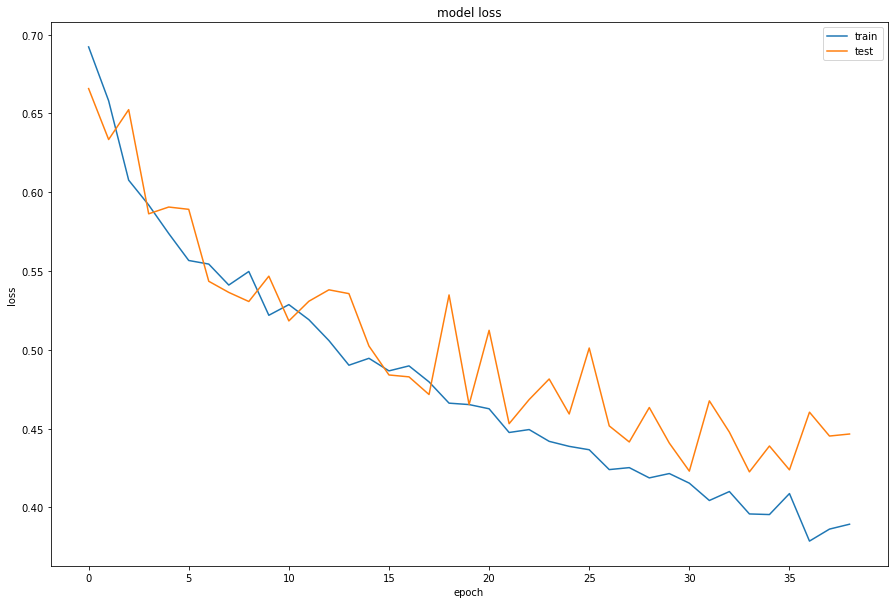

train loss= 0.38930338621139526
validation loss= 0.4465521275997162


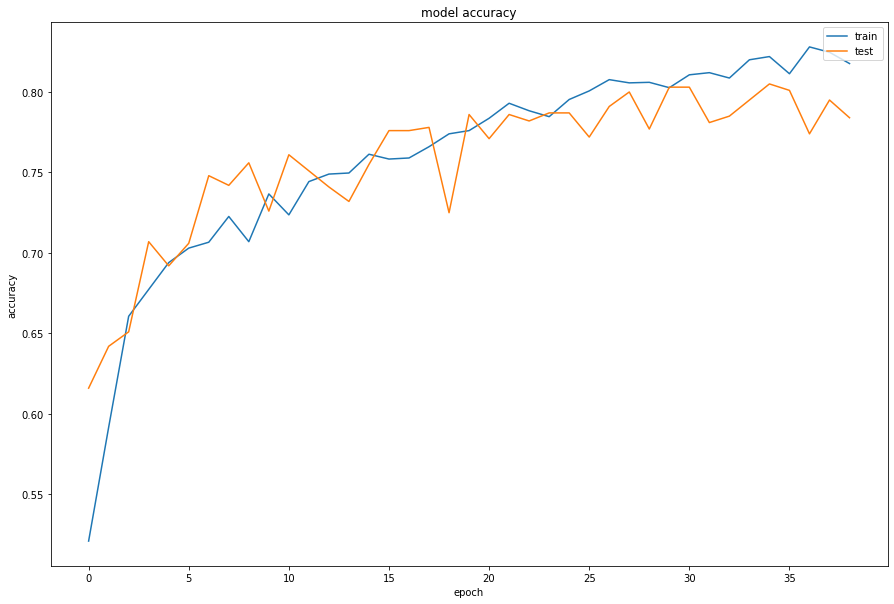

train accuracy= 0.8176666498184204
validation accuracy= 0.7839999794960022


In [4]:
# 학습 곡선을 나타내는 함수
def plot_loss_curve(history):
    plt.figure(figsize=(15, 10))

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()   
    
    print("train loss=", history.history['loss'][-1])
    print("validation loss=", history.history['val_loss'][-1])
    
def plot_acc_curve(history):
    plt.figure(figsize=(15, 10))

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()   
    
    print("train accuracy=", history.history['accuracy'][-1])
    print("validation accuracy=", history.history['val_accuracy'][-1])
    
plot_loss_curve(history)
plot_acc_curve(history)

In [5]:
import pathlib
import os,glob
import numpy as np
from PIL import Image

directory = 'C:/Users/s_csmscox/jupyterSave/dvc/test'
categories = ["0","1"] # dog = 1, cat = 0
nb_classes = len(categories)

w = 128
h = 128

X = []
y = []

for idx, obj in enumerate(categories):

    image_dir = directory + "/" + obj
    files = glob.glob(image_dir+"/*.jpg")
    print(obj, " 파일 길이 : ", len(files))
    
    for i, f in enumerate(files):
        img = Image.open(f)
        
        # 사이즈 조절
        img = img.resize((w, h))
        
        img = np.asarray(img)
        img = img.reshape(w,h,3)

        X.append(img)
        y.append(idx)

        if i % 10000 == 0:
            print(obj, " : ", f)

0  파일 길이 :  2500
0  :  C:/Users/s_csmscox/jupyterSave/dvc/test/0\cat.7500.jpg
1  파일 길이 :  2500
1  :  C:/Users/s_csmscox/jupyterSave/dvc/test/1\dog.7500.jpg


In [6]:
from tensorflow.keras.utils import to_categorical

X_test = np.array(X)
X_test = X_test/255

y_test = np.array(y)
y_test = to_categorical(y_test)

In [7]:
# 모델 평가
print("-- Evaluate --")
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
157/157 [==============================] - 1s 8ms/step - loss: 0.4466 - accuracy: 0.7962
accuracy: 79.62%
